In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

In [4]:
df = pd.read_csv('Dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

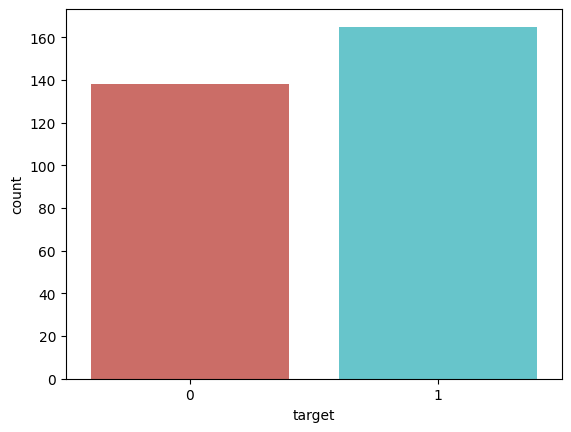

In [38]:
# bar plot of the number of patients with diabetes and without diabetes
sns.countplot(x='target', data=df, palette='hls')

In [39]:
# Missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
# Correlation matrix
corr = df.corr()
corr


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877
ca,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,-0.080155,1.000000,0.151832,-0.391724
thal,0.068001,0.210041,-0.161736,0.062210,0.098803,-0.032019,-0.011981,-0.096439,0.206754,0.210244,-0.104764,0.151832,1.000000,-0.344029


<AxesSubplot:>

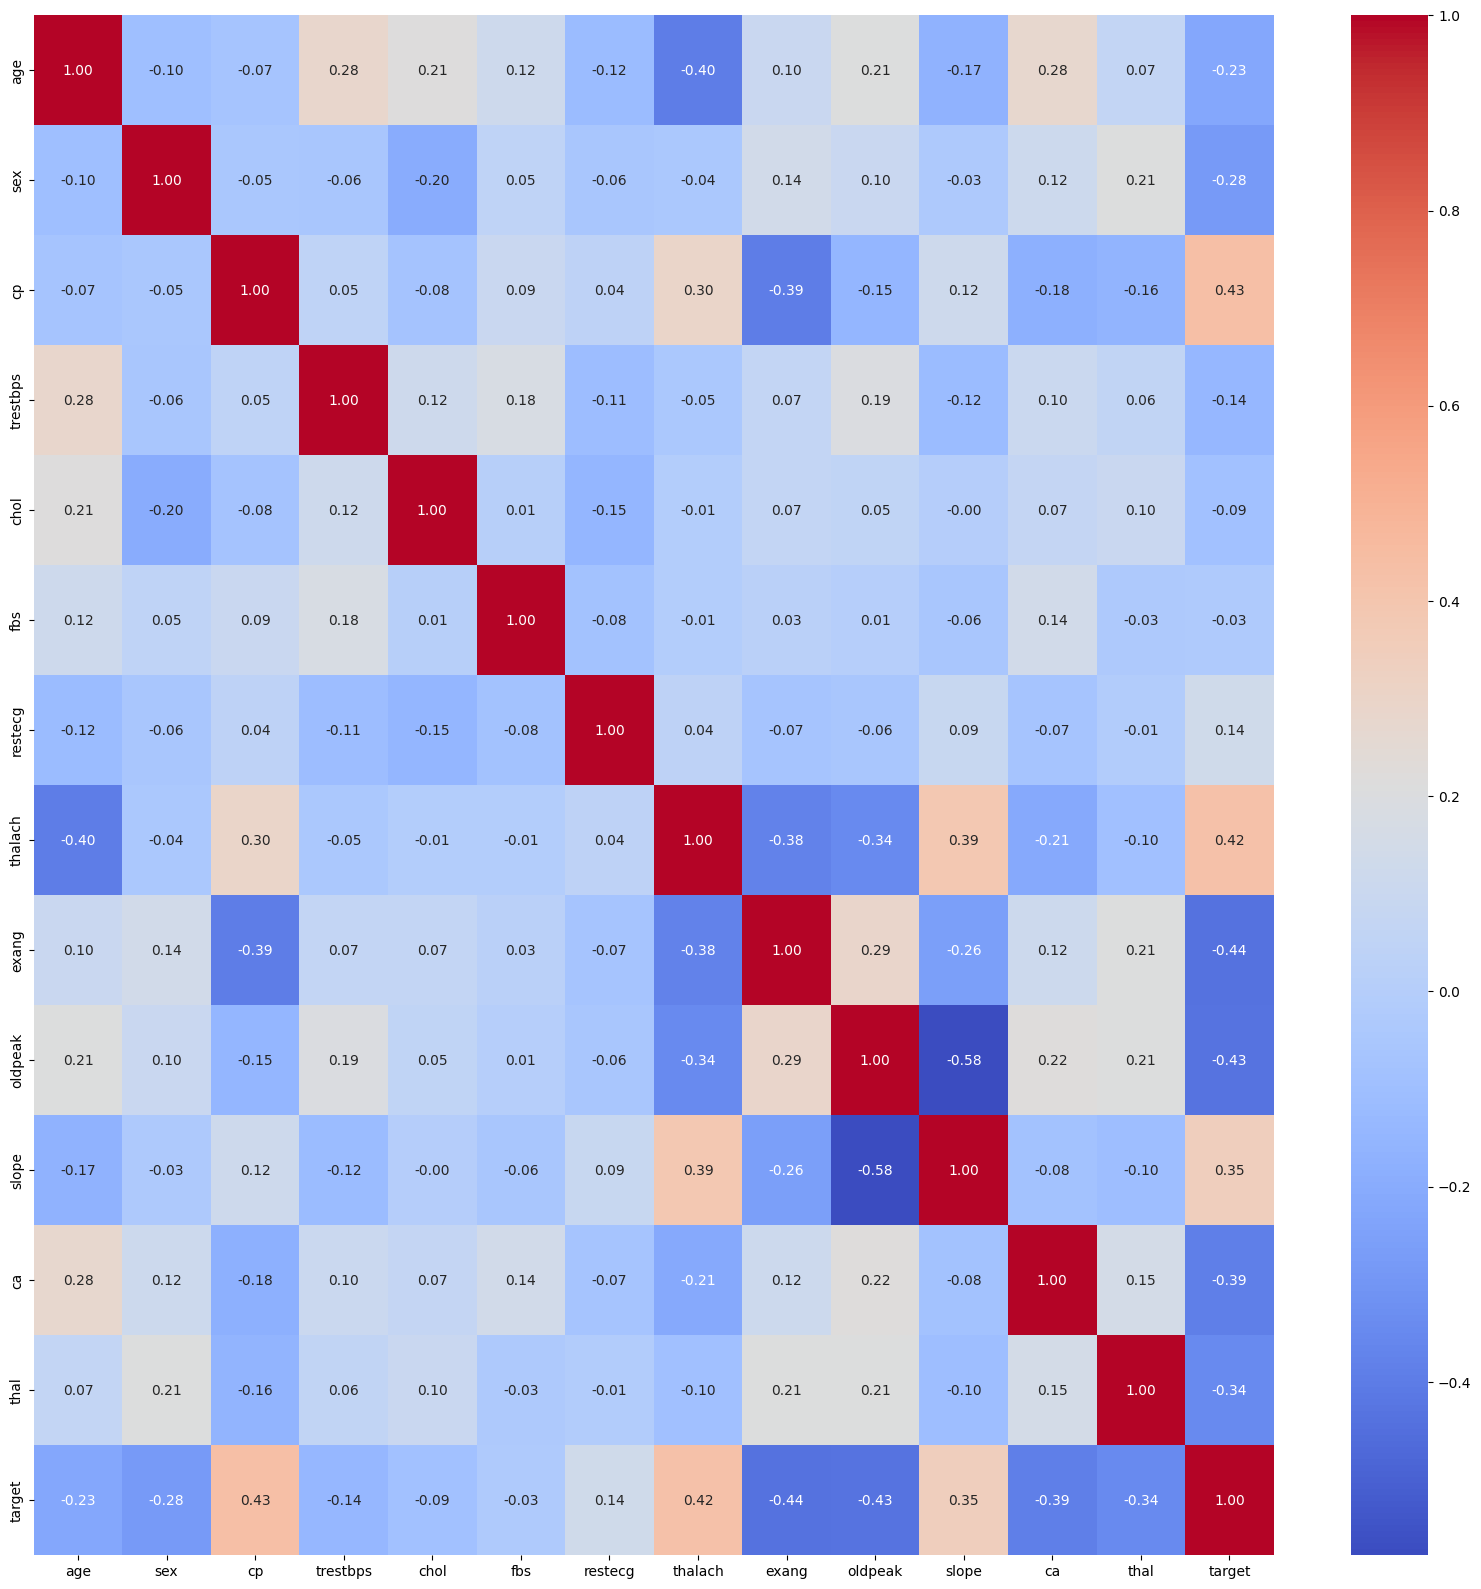

In [41]:
# Show the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

### Onehot encoding

In [42]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### No need because all values are already numerical

In [43]:
# Train test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  

| Algorithm | Accuracy |
|-----------|----------|
| Decision Tree | 0.79 |
| KNN | 0.74 |
| SVM | 0.83 |
| QDA | 0.84 |
|LDA|0.84|
|Naive Bayes algorithm|0.81|
|LSTM |0.81|
|Random forest algorithm|0.82|
|AdaBoost|0.79|
|k-means clustering|0.80|
|XGBoost|0.80|
|Gradient Boosting|0.80|

In [44]:
# K- fold cross validation for SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, r2_score, mean_squared_error, mean_absolute_error
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print("KNN_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

svm = SVC(kernel='linear', C=1, random_state=0)
scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
print("SVM_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
print("DecisionTree_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print("LogisticRegression_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Random Forest
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1, n_jobs=2)
score = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
print("RandomForest_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
score = cross_val_score(gbc, X, y, cv=10, scoring='accuracy')
print("GradientBoosting_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#XGbost 
from xgboost import XGBClassifier
xgb = XGBClassifier()
score = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
print("XGBoost_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

# K-means clustering 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print("K-means_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#k-means 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print("K-means_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#Navie bias 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
score = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print("Navie bias_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

# Ada bost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
score = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print("AdaBoost_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#learner regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
score = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
print("LinearRegression_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
score = cross_val_score(lasso, X, y, cv=10, scoring='accuracy')
print("LassoRegression_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
 
 


KNN_Accuracy: 0.65 (+/- 0.16)
SVM_Accuracy: 0.83 (+/- 0.14)
DecisionTree_Accuracy: 0.81 (+/- 0.10)


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

LogisticRegression_Accuracy: 0.83 (+/- 0.13)
RandomForest_Accuracy: 0.82 (+/- 0.12)
GradientBoosting_Accuracy: 0.80 (+/- 0.14)
XGBoost_Accuracy: 0.80 (+/- 0.10)
K-means_Accuracy: 0.80 (+/- 0.10)
K-means_Accuracy: 0.80 (+/- 0.10)


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Navie bias_Accuracy: 0.81 (+/- 0.13)
AdaBoost_Accuracy: 0.79 (+/- 0.18)
LinearRegression_Accuracy: nan (+/- nan)
LassoRegression_Accuracy: nan (+/- nan)


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 221, in

#### Best model is SVM with 0.83 accuracy

In [45]:
# Ensemble learning SVM and KNN
from sklearn.ensemble import VotingClassifier
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=0)
model = VotingClassifier(estimators=[('knn', knn), ('svm', svm)], voting='hard')
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Ensemble_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Ensemble_Accuracy: 0.75 (+/- 0.16)


In [46]:
# Ensemble learning SVM and logistic regression
from sklearn.ensemble import VotingClassifier
logreg = LogisticRegression()
svm = SVC(kernel='linear', C=1, random_state=0)
model = VotingClassifier(estimators=[('logreg', logreg), ('svm', svm)], voting='hard')
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Ensemble_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Ensemble_Accuracy: 0.83 (+/- 0.15)


In [47]:
# Ensemble learning KNN and logistic regression
from sklearn.ensemble import VotingClassifier
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
model = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn)], voting='hard')
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Ensemble_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Ensemble_Accuracy: 0.74 (+/- 0.14)


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Ensemble learning KNN, SVM and logistic regression
from sklearn.ensemble import VotingClassifier
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=0)
model = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn), ('svm', svm)], voting='hard')
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Ensemble_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Ensemble_Accuracy: 0.82 (+/- 0.12)


In [49]:
# Ensemble learning KNN, SVM, logistic regression and decision tree
from sklearn.ensemble import VotingClassifier
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=0)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn), ('svm', svm), ('tree', tree)], voting='hard')
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Ensemble_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Ensemble_Accuracy: 0.83 (+/- 0.15)


In [50]:
# USE SVM 
svm = SVC(kernel='linear', C=100, random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.85


In [51]:
#Predict the response for test dataset
input = [[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]
y_pred = svm.predict(input)
print(y_pred)

[1]


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [52]:
# Save the model sav file
import pickle
# sav
pickle.dump(svm, open('heart_model.sav', 'wb'))


In [53]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
print('Accuracy of QDA classifier on test set: {:.2f}'.format(qda.score(X_test, y_test)))

Accuracy of QDA classifier on test set: 0.84


In [54]:
# K-fold of QDA 
from sklearn.model_selection import cross_val_score
score = cross_val_score(qda, X, y, cv=10, scoring='accuracy')
print("QDA_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

QDA_Accuracy: 0.79 (+/- 0.11)


In [55]:
# # RMSE , MAE , RECALL ,Precisio, F1, R2 in qda
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, recall_score, precision_score, f1_score
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

RMSE:  0.40488816508945796
MAE:  0.16393442622950818
R2:  0.33551198257080617
Recall:  0.8529411764705882
Precision:  0.8529411764705882
F1:  0.8529411764705882


| Metric | Value |
|--------|-------|
| RMSE   | 0.40488816508945796 |
| MAE    | 0.16393442622950818 |
| R2     | 0.33551198257080617 |
| Recall | 0.9117647058823529 |
| Precision | 0.8157894736842105 |
| F1     | 0.861111111111111 |


In [56]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on test set: 0.84


In [57]:
#K-fold of LDA
from sklearn.model_selection import cross_val_score
score = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
print("LDA_Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

LDA_Accuracy: 0.82 (+/- 0.12)


In [58]:
# RMSE , MAE , RECALL ,Precisio, F1, R2 in lda
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, recall_score, precision_score, f1_score
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))


RMSE:  0.40488816508945796
MAE:  0.16393442622950818
R2:  0.33551198257080617
Recall:  0.9117647058823529
Precision:  0.8157894736842105
F1:  0.861111111111111


| Metric | Value |
|--------|-------|
| RMSE   | 0.40488816508945796 |
| MAE    | 0.16393442622950818 |
| R2     | 0.33551198257080617 |
| Recall | 0.9117647058823529 |
| Precision | 0.8157894736842105 |
| F1     | 0.861111111111111 |
|K-fold|0.82 (+/- 0.12)|

In [59]:
#LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import MaxPooling1D 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling1D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import PReLU
from keras.layers import ELU
from keras.layers import ThresholdedReLU
from keras.layers import Softmax
from keras.layers import ReLU
from keras.layers import Add
from keras.layers import Multiply
from keras.layers import Average
from keras.layers import Maximum
from keras.layers import Minimum
from keras.layers import Concatenate
from keras.layers import Dot
from keras.layers import GaussianNoise
from keras.layers import GaussianDropout
from keras.layers import AlphaDropout
from keras.layers import ActivityRegularization
from keras.layers import Masking

In [60]:
# Traning
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)
 

Epoch 1/150
25/25 [==============================] - 1s 4ms/step - loss: 14.6223 - accuracy: 0.4587
Epoch 2/150
25/25 [==============================] - 0s 4ms/step - loss: 6.1473 - accuracy: 0.4463
Epoch 3/150
25/25 [==============================] - 0s 4ms/step - loss: 1.8296 - accuracy: 0.4959
Epoch 4/150
25/25 [==============================] - 0s 4ms/step - loss: 1.5627 - accuracy: 0.4339
Epoch 5/150
25/25 [==============================] - 0s 4ms/step - loss: 1.3141 - accuracy: 0.4298
Epoch 6/150
25/25 [==============================] - 0s 4ms/step - loss: 1.0730 - accuracy: 0.4669
Epoch 7/150
25/25 [==============================] - 0s 4ms/step - loss: 0.9567 - accuracy: 0.4628
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.9243 - accuracy: 0.4463
Epoch 9/150
25/25 [==============================] - 0s 4ms/step - loss: 0.8447 - accuracy: 0.4669
Epoch 10/150
25/25 [==============================] - 0s 5ms/step - loss: 0.7892 - accuracy: 0.4628
Epoch 11

In [61]:
# Accuracy 
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


2/2 [==============================] - 1s 6ms/step - loss: 0.4357 - accuracy: 0.8033
Accuracy: 80.33


In [62]:
# Accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


2/2 [==============================] - 0s 5ms/step - loss: 0.4357 - accuracy: 0.8033
Accuracy: 80.33


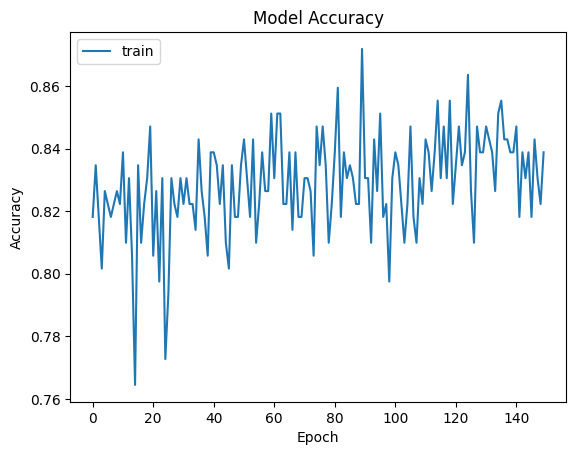

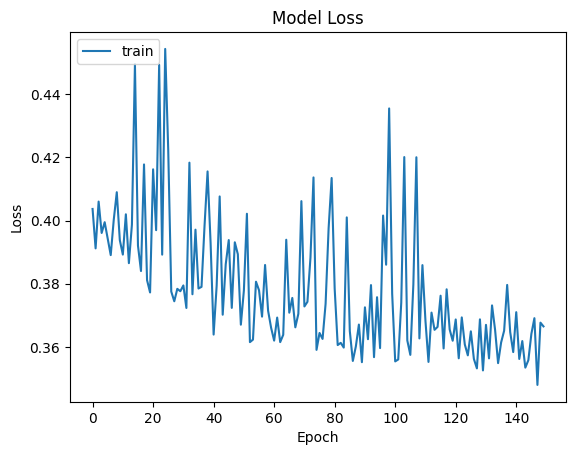

In [63]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling1D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import PReLU
from keras.layers import ELU
from keras.layers import ThresholdedReLU
from keras.layers import Softmax
from keras.layers import ReLU
from keras.layers import Add
from keras.layers import Multiply
from keras.layers import Average
from keras.layers import Maximum
from keras.layers import Minimum
from keras.layers import Concatenate
from keras.layers import Dot
from keras.layers import GaussianNoise
from keras.layers import GaussianDropout
from keras.layers import AlphaDropout
from keras.layers import ActivityRegularization
from keras.layers import Masking


In [65]:
# Traing for parkinsons
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.array(y_train)
y_test = np.array(y_test)


In [66]:
# Train
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32,
          validation_data=(X_test, y_test))


Epoch 1/10
8/8 [==============================] - 36s 934ms/step - loss: 0.6980 - accuracy: 0.5331 - val_loss: 0.6939 - val_accuracy: 0.4426
Epoch 2/10
8/8 [==============================] - 1s 110ms/step - loss: 0.6974 - accuracy: 0.4959 - val_loss: 0.6863 - val_accuracy: 0.5574
Epoch 3/10
8/8 [==============================] - 1s 119ms/step - loss: 0.6986 - accuracy: 0.5372 - val_loss: 0.6892 - val_accuracy: 0.5574
Epoch 4/10
8/8 [==============================] - 1s 142ms/step - loss: 0.6853 - accuracy: 0.5620 - val_loss: 0.6840 - val_accuracy: 0.5574
Epoch 5/10
8/8 [==============================] - 1s 199ms/step - loss: 0.6894 - accuracy: 0.5248 - val_loss: 0.6852 - val_accuracy: 0.6885
Epoch 6/10
8/8 [==============================] - 1s 144ms/step - loss: 0.6823 - accuracy: 0.5826 - val_loss: 0.6783 - val_accuracy: 0.5574
Epoch 7/10
8/8 [==============================] - 1s 123ms/step - loss: 0.6708 - accuracy: 0.6033 - val_loss: 0.6577 - val_accuracy: 0.7541
Epoch 8/10
8/8 [===

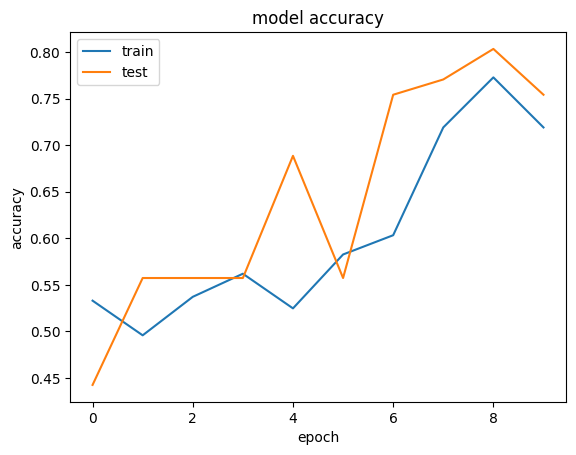

In [67]:
# Accuracy graph
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Debugging some issues with the model

In [2]:
# load model .sav file
import pickle
model = pickle.load(open('Saved Model\heart_model.sav', 'rb'))

c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator SVC from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
num_inputs = model.coef_.shape[1]
print("Number of inputs expected by the model:", num_inputs)

Number of inputs expected by the model: 13


In [6]:
# Print the coefficients for each input feature
input_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                  'exang', 'oldpeak', 'slope', 'ca', 'thal']
coefficients = model.coef_[0]
for i, feature in enumerate(input_features):
    print(f"{feature}: {coefficients[i]}")


age: -0.018721532999080637
sex: -3.8450785895695843
cp: 1.7362433490845106
trestbps: -0.006903693052208837
chol: 0.004687575214006756
fbs: -0.5591263508695761
restecg: 1.2854227995031806
thalach: 0.021288851069357406
exang: -2.6429076452048434
oldpeak: -0.9059285105735748
slope: 0.6748280542143563
ca: -1.1273699579980985
thal: -1.0493103687125185


In [7]:
# Load dataset
import pandas as pd
df = pd.read_csv('Dataset/heart.csv')

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Unit testing for particular values

In [26]:
import numpy as np
import unittest

In [27]:
class TestHeartModel(unittest.TestCase):

    def setUp(self):
        # Load the model
        with open('Saved Model/heart_model.sav', 'rb') as f:
            self.model = pickle.load(f)

In [28]:
def test_model_accuracy(self):
    # Prepare test data
    test_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1],
                          [37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2],
                          [41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2],
                          [56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2],
                          [57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2]])
    expected_output = np.array([1, 1, 1, 1, 1])

    # Make predictions
    predicted_output = self.model.predict(test_data)

    # Compare predicted and expected outputs
    error_message = f"Predicted output: {predicted_output}. Expected output: {expected_output}."
    self.assertSequenceEqual(list(predicted_output),
                             list(expected_output), error_message)


In [29]:
# If no assertion error was raised, print a message indicating that the test passed
print("Test passed successfully!")


Test passed successfully!


### Doing Unit testing for full dataset

In [3]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Load the saved model
with open('Saved Model/heart_model.sav', 'rb') as f:
    model = pickle.load(f)

# Load the test data
test_data = pd.read_csv('Dataset/heart.csv')

# Prepare the test data
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)


c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator SVC from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mostafizur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [4]:
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"Accuracy of the model: {accuracy:.2%}")


Accuracy of the model: 84.16%


In [2]:
# Print the test results as a percentage
print(f"Test accuracy: {accuracy*100:.2f}%")


Test accuracy: 84.16%


@Saiful-hero No bug found in this model. Unit test passed.